----

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products= pd.read_csv('/datasets/products.csv', sep=';')
df_aisles= pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments= pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products= pd.read_csv('/datasets/order_products.csv', sep=';')


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Bien hecho al importar la data usando el parámetro `sep=;"` para que la lectura de los datos se pueda realizar correctamente.
    

</div>

In [3]:
# mostrar información del DataFrame

print(df_instacart.head())
df_instacart.info()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [4]:
# mostrar información del DataFrame
print(df_products.head())
df_products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
print(df_aisles.head())
df_aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
print(df_departments.head())
df_departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
print(df_order_products.head())
df_order_products.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien al mostrar parte de la data, pero te recomiendo usar `display()` para mostrar un dataframe, da mejor formato de output que `print()`. Por ejemplo, en vez de usar `print(df.head())`, usa `display(df.head())`.

</div>

## Conclusiones

**Descripción de los datos:**

Para este caso de anâlisis tenemos 5 archivos diferentes por procesar, todos separados por ';'. En general, no usan mayúsculas, no hay espacios u otros caracteres en los nombres y usan snake_case para denominar las columnas.
1. En el archivo instacart: tenemos valores enteros y en la columna de "dias desde el pedido", toma los dias como float y solo en esta columna tenemos valores nulos.
2. En el archivo products: Encontramos la distribución de los productos por 'aisle' y 'department' y algunos productos no tienen nombre.
3. En el archivo aisles: Encontramos únicamente dos columnas, sin datos nulos.
4. En el archivo departments: no hay datos nulos.
5. En el archivo order_products: Encontramos una gran cantidad de datos almacenados, donde la columna 'add_to_cart_order' es la única con datos nulos y en formato float.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_instacart.duplicated().sum())
duplicados = df_instacart[df_instacart.duplicated()]
print(duplicados)

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

**Tengo 15 filas duplicadas y todas tienen en común el día de la semana y la hora del pedido.**

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_wed_2am= df_instacart.loc[(df_instacart['order_dow']==3) & (df_instacart['order_hour_of_day']== 2)]
print(orders_wed_2am.tail(30))
print(orders_wed_2am.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
346889   2291746    40940             7          3                  2   
350080   2593771   153869             8          3                  2   
354984   2602339    65989             7          3                  2   
354993    391768    57671            19          3                  2   
359625    332561   201301             1          3                  2   
371029   1477271    28904             8          3                  2   
371905    391768    57671            19          3                  2   
384090   1983940    37173             4          3                  2   
394347    467134    63189            21          3                  2   
395002   1090993    30945             5          3                  2   
400167    774488    66195            16          3                  2   
410100   2934579   105857             4          3                  2   
411408   1286742   183220            48          3 

¿Qué sugiere este resultado? 

**Puede ser que ese día quedaron ingresados 15 pedidos dos veces, lo cual nos genera esos duplicados, es decir, podemos eliminarlos sin tener consecuencias con el analisis posterior** 

In [10]:
# Elimina los pedidos duplicados
df_instacart= df_instacart.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas

print(df_instacart.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(df_instacart['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Hallazgos:**
Se encontraron en todo el df 15 filas duplicadas de pedidos ingresados dos veces al sistema. Después de identificar el problema y la no relevancia de estos datos, se eliminaron y se reestablecieron los indices del nuevo archivo para poder proceder con el analisis sin inconvenientes.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Bien hecho, dado que todos los duplicados coincidian en el horario y día, es probable que se haya debido a un problema momentaneo en el registro de la data
</div>

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

print(df_products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['department_id'].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name']= df_products['product_name'].str.upper()
print(df_products['product_name'].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products_no_null= df_products[df_products['product_name'].notnull()] 
print(products_no_null.duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos**

Dentro del df de products se verificaron los datos para saber si tenemos datos duplicados, ya sea por filas completamente duplicadas, departamentos duplicados (lo que es normal, ya que varios productos pueden pertenecer a un departamento). 
Luego verificamos que los productos no estuvieran duplicados, ya que deberiamos juntarlos para no tener el mismo producto varias veces inventariado, lo cual nos indica que si estan duplicados, pero al filtrar los valores no nulos de la columna, vemos que los únicos valores duplicados eran los nulos, asi que podemos concluir que los productos estan bien inventariados y podemos empezar a procesar los datos.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien. En este caso, no es anormal encontrar nombres duplicados y no es necesario eliminarlos. Tienen diferente id, por lo tanto, es posible que sean diferentes versiones de un mismo producto.
</div>

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos

# NOTA: No puedo reviar esto ya que esta columna no existe en el df de departamentos.
# Las únicas columnas que tengo es departament_id y department
# solo puedo verificar si el department_id se encuentra duplicado:
print(df_departments['department_id'].duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos**

No tenemos filas duplicadas en este df, esta listo para el analisis.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisles['aisle_id'].duplicated().sum())

0


**Describe brevemente tus hallazgos y lo que hiciste con ellos**

No tenemos filas duplicadas en este df, esta listo para el analisis.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(df_order_products['order_id'].duplicated().sum())
print(df_order_products[df_order_products.duplicated(['order_id','product_id'])].sum())
print(df_order_products.duplicated(['order_id','product_id']).sum())

4094961
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64
0


**Describe brevemente tus hallazgos y lo que hiciste con ellos**

No hay filas duplicadas en el df order_products. En cuanto a los duplicados por numero de orden, tenemos bastantes (teniendo en cuenta que una sola orden puede tener varios productos, es algo que se esperaria). Pero ya al comparar los datos relacionados con order_id y product_id, vemos que no tenemos duplicados, es decir, podemos continuar trabajando con los datos que tenemos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo en la revisión de los duplicados.
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
product_name_null = df_products[df_products['product_name'].isna()]
print(product_name_null)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Describe brevemente cuáles son tus hallazgos**
Tenemos 1258 valores nulos en la columna product_name, lo cual podria complicar el analisis si queremos hacer un conteo total de los productos por ejemplo. Se deberian revisar para borrarlos o modificarlos. por ejemplo, la relacion con el aisle 100 en el department 21.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
name_null_100 = product_name_null.loc[product_name_null['aisle_id']== 100]
print(name_null_100)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Describe brevemente cuáles son tus hallazgos**

Al filtrarlos por aisle_id nos damos cuenta que exactamente todos los valores nulos corresponden al aisle 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
dep_null_21 = product_name_null.loc[product_name_null['department_id']== 21]
print(dep_null_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Asimismo, todos los valores nulos estan relacionados con el departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
dep_and_aisle_null= product_name_null.loc[(product_name_null['department_id']== 21) & (product_name_null['aisle_id']== 100)]
print(dep_and_aisle_null)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Efectivamente todos los datos nulos son del aisle 100 y department 21.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Se reemplazaron todos los datos NaN por Unknown para poder trabajar con ellos, ya que no sabemos exactamente que paso con los productos del aisle 100/department 21.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, debe haber sido un error específico al registrar los datos de ese pasillo y departamento
</div>

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders_null = df_instacart.isna()
print(orders_null.sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
not_first_order =df_instacart[(df_instacart['order_number']!=1)].isna()
print(not_first_order.sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Podemos ver que si separamos los primeros pedidos de cada cliente, no encontramos valores nulos en nuestros datos, es decir, que siempre que se realiza el primer pedido nos da en la columna de cias despues del primer pedido un valor nulo, lo cual es de esperarse.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
orders_null_products = df_order_products.isna()
print(orders_null_products.sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'el mínimo de la columna add_to_cart_order es', df_order_products['add_to_cart_order'].min())

print(f'el máximo de la columna add_to_cart_order es', df_order_products['add_to_cart_order'].max())


el mínimo de la columna add_to_cart_order es 1.0
el máximo de la columna add_to_cart_order es 64.0


Todos los valores ausentes del archivo se encuentran en la columna add_to_cart_order. En la cuál los valores se encuentran entre el 1 y el 64 en formato float.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_id_null = df_order_products.loc[df_order_products['add_to_cart_order'].isna(),'order_id']
print(order_id_null)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
orders_with_null = df_order_products[df_order_products['order_id'].isin(order_id_null)]
print(orders_with_null)
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
product_counts= orders_with_null.groupby('order_id')['product_id'].count()
print('el conteo de productos en cada pedido es:')
print(product_counts)
print('el mínimo del conteo es:', product_counts.min())
print('el máximo del conteo es:', product_counts.max())

         order_id  product_id  add_to_cart_order  reordered
267       2094761       31469               57.0          1
737       2449164        5068                NaN          0
1742      2997021        4920               37.0          0
3463       871281       40063               61.0          1
3535       171934       36397                7.0          0
...           ...         ...                ...        ...
4543519   2621907       32018               28.0          1
4544672    102236       34688               49.0          0
4544708   2256933       41544               21.0          0
4544771    180546       12741               46.0          1
4544810   2136777       20072               10.0          0

[5316 rows x 4 columns]
el conteo de productos en cada pedido es:
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: in

**Conclusión corregida**
Primero filtramos todos los que tienen un valor nulo, luego filtramos los productos de esos pedidos por numero de orden, los contamos y sacamos sus mínimos y máximos. 
Teniendo en cuenta esto vemos que el mínimo de productos en una orden es de 65, es decir, que puede ser que el sistema tenga un límite hasta 64 que no le permite seguir registrando el conteo cuando lo sobrepasa y por eso nos arroja valores nulos. Sin embargo el conteo real es de hasta 127 productos en un pedido.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Ya se cambiaron los valores ausentes por un 999 para estar seguros de que la fila cuente sin que afecte su procesamiento e igualmente se pasaron a números enteros ya que no tiene sentido que se traten como flotantes para su análisis.

## Conclusiones

Se revisó cada uno de los df para estandarizar los datos, empezando por las filas duplicadas, identificandolas, tratando de encontrar la razon de su doble registro y modificandolas para el análisis. Además, se idenitficaron los valores ausentes y se reemplazaron por valores con sentido para su procesamiento. POr ùltimo, se estandarizo el tipo de dato para las columnas a las cuales se les habia asignado un tipo que no correspondia. 
Los datos ya se encuentran estandarizaos y listos para su análisis.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_instacart['order_hour_of_day'].min())
print(df_instacart['order_hour_of_day'].max())

0
23


In [36]:
print(df_instacart['order_dow'].min())
print(df_instacart['order_dow'].max())

0
6


Todos los valores en ambas columnas se encuentran en un rango razonable.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

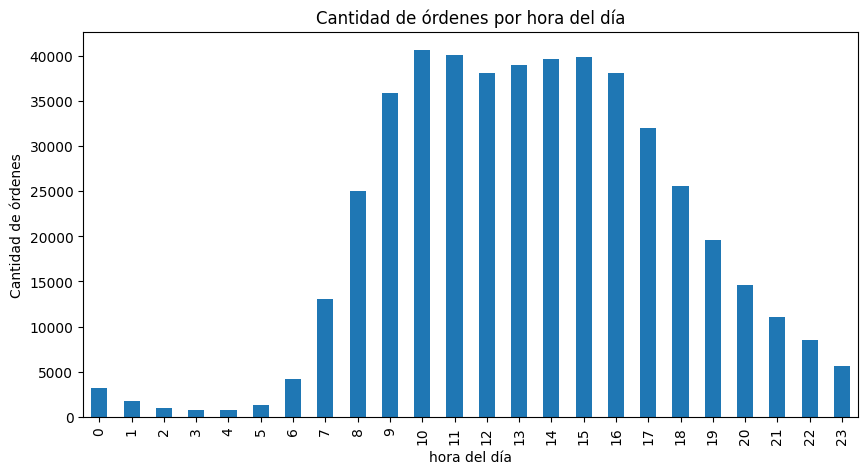

In [37]:
from matplotlib import pyplot as plt

orders_per_hour= df_instacart.groupby('order_hour_of_day')['order_id'].count().sort_index()
orders_per_hour.plot(kind='bar',
                     ylabel= 'Cantidad de órdenes',
                    xlabel='hora del día',
                    title= 'Cantidad de órdenes por hora del día',
                    figsize=[10,5])
plt.show()

La mayor cantidad de pedidos se realizan entre las 10 y las 16 horas, mientras que en la noche de 0 a 5 de la mañana se hacen muy pocos pedidos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

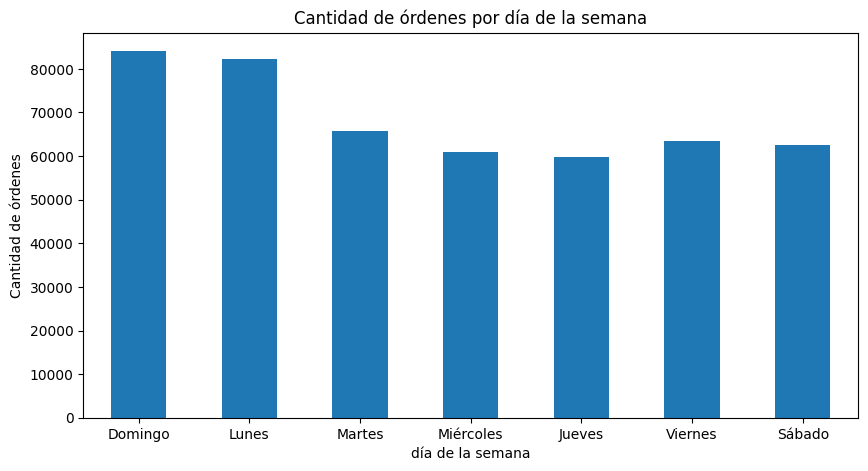

-0.0014500588401290583

In [38]:
orders_per_day = df_instacart.groupby('order_dow')['order_id'].count().sort_index()
days = pd.Series(orders_per_day.index).replace({
    0: 'Domingo',
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado'})
orders_per_day.index = days
orders_per_day.plot(kind='bar',
                    ylabel= 'Cantidad de órdenes',
                    xlabel='día de la semana',
                    title= 'Cantidad de órdenes por día de la semana',
                    figsize=[10,5],
                   rot= 0)
plt.show()
df_instacart['order_dow'].corr(df_instacart['order_id'])

En la gráfica podemos ver que la diferencia entre los dias es mínima y se aumenta la cantidad de pedidos los domingos y lunes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


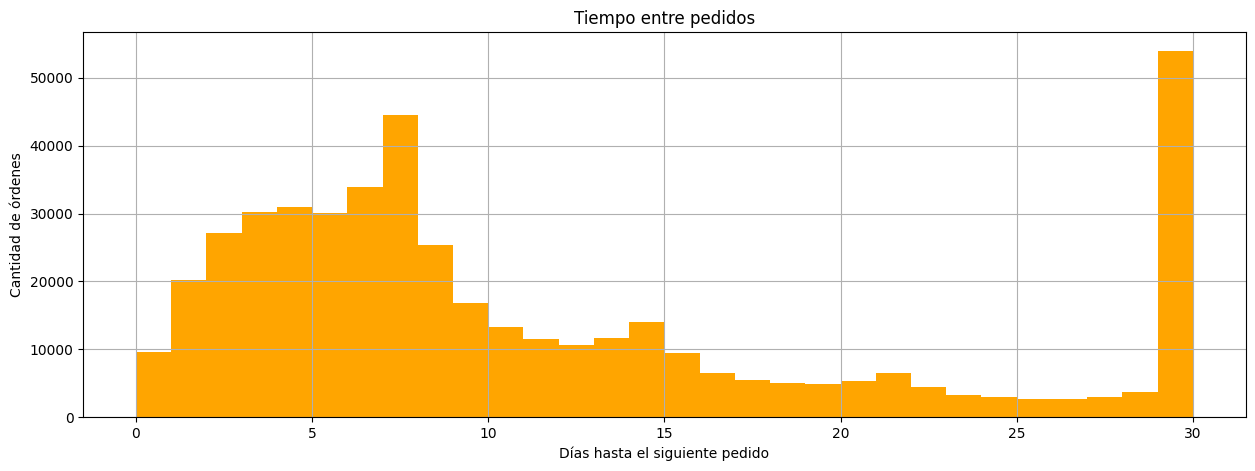

In [39]:
print(df_instacart['days_since_prior_order'].describe())
df_instacart['days_since_prior_order'].plot(kind='hist', bins=30, 
                                            title='Tiempo entre pedidos',
                                            color='orange', grid = True, 
                                           figsize=[15,5])
plt.xlabel('Días hasta el siguiente pedido')
plt.ylabel('Cantidad de órdenes')
plt.show()

Con ayuda de los datos estadísticos y la gráfica, podemos ver que la diferencia de días se encuentra entre los 0 y los 30 días, donde la mayor cantidad de pedidos en la plataforma se realizan cada 30 días y con una incidencia particular a los 7 días que nos indica que la mayoría de los usuarios hacen sus pedidos una vez a la semana o una vez al mes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, el gráfico es correcto. Nota que el tiempo de 30 días es muy alto. Probablemente se debe a que el sistema no registra más de 30 días entre compras y todas las que son de más de ese tiempo las guarda como 30.
    
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

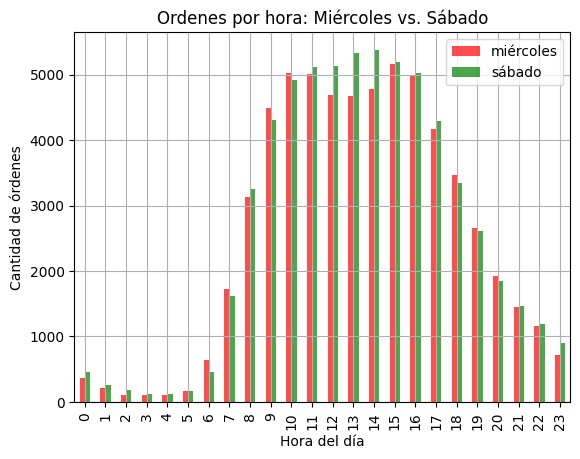

In [57]:
wed = df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()

sat = df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

compara = pd.DataFrame({'Miércoles': wed,'Sábado': sat})
compara.plot(kind='bar', color=['red','green'], alpha=0.7)


plt.title('Ordenes por hora: Miércoles vs. Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de órdenes')
plt.grid(True)
plt.legend(['miércoles','sábado'])
plt.show()

Para los días miercoles y sabado entre las horas del día no se ven diferencias significativas en cuanto a la cantidad de pedidos realizados. Sin embargo, se refleja que hay se hacen más pedidos los sabados al medio día.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

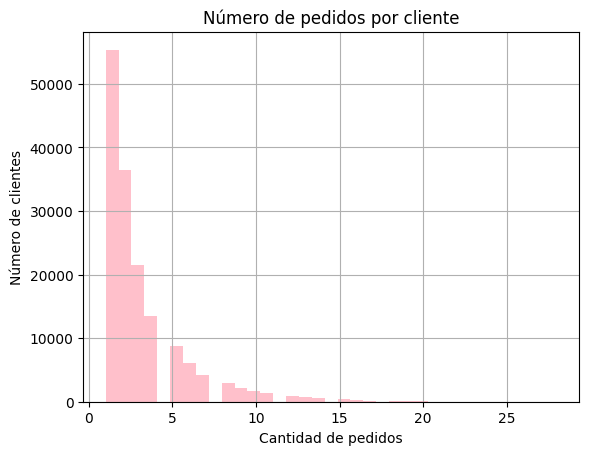

In [41]:
orders_per_user = df_instacart['user_id'].value_counts()
orders_per_user.plot(kind='hist', bins=35, color='pink', title='Número de pedidos por cliente')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()

In [42]:
print(orders_per_user.describe())

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: user_id, dtype: float64


La mayoría de clientes hacen entre 1 y 3 pedidos, con una media de 3 pedidos por usuario.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
    
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
df_products_merged =df_order_products.merge(df_products,
                             on='product_id')
df_products_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
dtypes: int64(6), object(1)
memory usage: 277.4+ MB


In [44]:
fav_products= df_products_merged.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
print(fav_products.head(20))

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


Para poder obtener los nombres de los productos fue necesario combinar los datos del DataFrames de los pedidos con el de los porductos. 
Luego al observar la cantidad de veces que se repite cada producto en las ordenes y organizarlos de forma descendente vemos que los productos más solicitados son las frutas y los productos orgánicos. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [45]:
products_per_order = df_order_products.groupby('order_id')['product_id'].count()
products_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

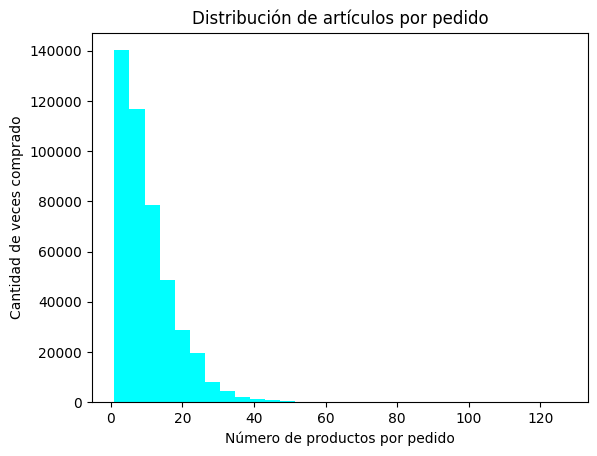

In [46]:
products_per_order.plot(kind='hist',bins=30, color='aqua', title='Distribución de artículos por pedido')
plt.xlabel('Número de productos por pedido')
plt.ylabel('Cantidad de veces comprado')
plt.show()

El promedio de la cantidad de artículos comprados por pedido es de 10, con un pedido maximo de 127 productos pero muy alejados de la mayoria de pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
fav_products_reordered= df_products_merged[df_products_merged['reordered']==1]
fav_products_reordered= fav_products_reordered.groupby(['product_id','product_name'])['reordered'].count().sort_values(ascending=False)

print(fav_products_reordered.head(20))

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: reordered, dtype: int64


Inicialmente debemos filtrar los productos que se volvieron a ordenar y a simple vista se puede ver que tiene mucha relacion con los 20 productos mas solicitados en general en la plataforma.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [48]:
total_orders=df_products_merged.groupby(['product_id','product_name'])['reordered'].count()
print(total_orders)

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           280
2           ALL-SEASONS SALT                                                      11
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                  42
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE     49
7           PURE COCONUT WATER WITH ORANGE                                         2
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          5
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         72
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                       12
49693       SPRING WATER BODY WASH                                                25
49694       BURRITO- STEAK & CHEESE                                     

In [49]:
reordered_sum= df_products_merged.groupby(['product_id','product_name'])['reordered'].sum()
print(reordered_sum)

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           158
2           ALL-SEASONS SALT                                                       0
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                  31
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE     25
7           PURE COCONUT WATER WITH ORANGE                                         1
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          4
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         31
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                        5
49693       SPRING WATER BODY WASH                                                11
49694       BURRITO- STEAK & CHEESE                                     

In [50]:
reorder_ratio = reordered_sum/total_orders
print(reorder_ratio.sort_values(ascending=False).head())

product_id  product_name                                                    
14721       BONE STRENGTH TAKE CARE                                             1.0
20949       VANILLA SANDWICH COOKIES                                            1.0
6723        PALMIERS- PETITE                                                    1.0
6732        NATURALLY SPARKLING MINERAL WATER                                   1.0
45088       CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & OLIVE OIL INFUSION    1.0
Name: reordered, dtype: float64


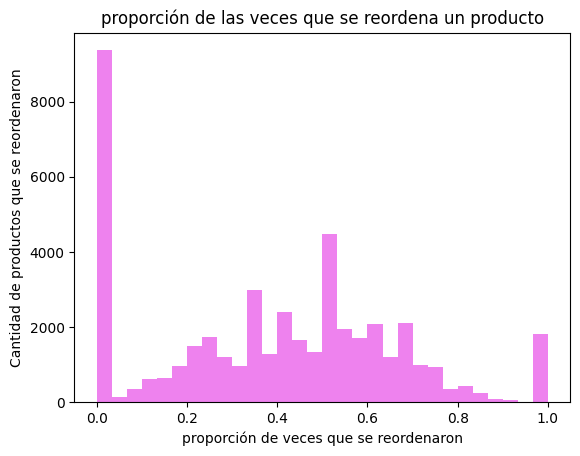

In [51]:
reorder_ratio.plot(kind='hist', bins=30, color= 'violet', title='proporción de las veces que se reordena un producto')
plt.xlabel('proporción de veces que se reordenaron')
plt.ylabel('Cantidad de productos que se reordenaron')
plt.show()

Según los resultados podemos ver que, por su cercanía al 0, la mayoría de productos los piden una sola vez. Menos del 2% de los productos se reordenan siempre. Esto quiere decir que el cliente es leal al producto. Para los demás productos podría hacerse algún tipo de promoción o propaganda para que los reordenen con más frecuencia.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [52]:
df_order_merged =df_instacart.merge(df_products_merged,
                             on='order_id')
df_order_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 450.8+ MB


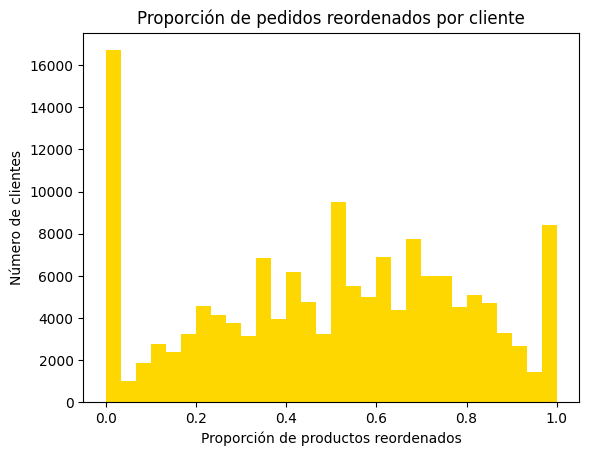

In [53]:

client_reorder_ratio = df_order_merged.groupby('user_id')['reordered'].mean()
client_reorder_ratio.plot(kind='hist', bins = 30, color= 'gold',title='Proporción de pedidos reordenados por cliente')
plt.xlabel('Proporción de productos reordenados')
plt.ylabel('Número de clientes')
plt.show()

Analizando específicamente a cada cliente en particular vemos que la gráfica es similar. La mayoría de los clientes solicitan un producto solo una vez. Hay varios clientes que lo vuelven a solicitar pero no siempre (Tal vez tiene que ver con la temporada, la necesidad del cliente o las promociones)y la siguiente gran proporción es de clientes que son fieles a sus productos y vuelven a comprarlos cada vez que hacen un pedido por la plataforma.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto. Sucede algo parecido que con los productos.
    
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [54]:
first_cart_products= df_order_merged[df_order_merged['add_to_cart_order']==1]
top_first_products = first_cart_products.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
print(top_first_products.head(20))

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

In [55]:
correlacion = fav_products.corr(top_first_products)
print(correlacion)

0.8981545169064388


A simple vista con los datos vemos que el top 1 de lo mas solicitado en general, reordenado y de primeras en el carro de compras de los clientes es la banana indiscutiblemente, es el porducto estrella. Mirando la correlacion entre los productos mas solicitados y los que se colocan de primeras en el carro de compras vemos que con un 0,9 es una correlacion positiva casi perfecta, lo que confirma nuestra hipotesis de similitud. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto. Se repiten los producots reordenados con los más ordenados, ya que son los más populares en general.
    
</div>

### Conclusion general del proyecto:

De los 5 conjuntos de datos luego de su preprocesamiento eliminando sus duplicados y estandarizando los valores ausentes podemos concluir que:

1. En cuanto al **comportamiento de los clientes**: se realizan mas pedidos los dias domingo y lunes, sin embargo, hay un movimiento estable y lineal los otros dias de la semana. 
    - Por otro lado de 10am a 4pm se realizan la mayor cantidad de pedidos, siendo de media noche a 5 de la mañana la franja horaria con menor movimiento. 
    - Ya viendo el comportamiento en el mes, la gran mayoria hace pedidos solamente una vez al mes. 
2. Si nos vamos al **analisis de los productos** comprados, reordenados, preferidos y puestos de primeras en el carro de compras, vemos que tienen una relacion muy estrecha siendo frutas y productos organicos los mas solicitados y la banana el producto estrella de la plataforma. 
3. Teniendo en cuenta el **comportamiento de compra** vemos que la mayoria de los clientes hacen solo un pedido y luego disminuye su cantidad drásticamente, lo cual se relaciona con la cantidad de productos reordenados, ya que hay muchos clientes casuales y la mayoria de los productos se piden una unica vez.
    - Tambien obervamos que la mayoria de pedidos son pequeños de menos de 10 productos y las 75% son menores de 14 productos.
**Sugerencia:**
Podria funcionar muy bien una campaña de fidelización enfocadaen los usuarios que ya realizaron su primer pedido, incentivando su permanencia a través de descuentos personalizados, recomendaciones basadas en su primera compra o programas de recompensas.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelentes conclusiones. Haces muy bien al incluir valores de las métricas muy importantes y resumens los principales hallazgos, buen trabajo!
    
</div>